<a href="https://colab.research.google.com/github/hmyrcmn/FaceMaskDetectionYolo/blob/main/maskAndHairnetDetectionTogetter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import os
HOME=os.getcwd()
HOME

'/content'

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Xe5edr7dTpMXhHpjoXvb")
project = rf.workspace("msuiit-2bqvu").project("mask-and-hairnet-detection-model")
dataset = project.version(10).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.



Extracting Dataset Version Zip to Mask-and-Hairnet-Detection-Model-10 in yolov8:: 100%|██████████| 24242/24242 [00:03<00:00, 7287.22it/s]


In [4]:
!pip install ultralytics
# IPython'dan display modülünü içe aktarın
from IPython import display

# IPython çıktılarını temizleyin
display.clear_output()

# YOLOv8 modelini kontrol etmek için komutu çalıştırın
#!yolo mode=train

!yolo mode=checks



Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 392, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

In [5]:
from ultralytics import YOLO
from IPython.display import display,Image

In [6]:
%cd {HOME}

!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source="/content/Mask-and-Hairnet-Detection-Model-10/train/images/cols111-mp4_00429_jpg.rf.00ccc85ce6d72474e453cfafa8af475e.jpg"


/content
100% 6.23M/6.23M [00:00<00:00, 95.5MB/s]
Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (AMD EPYC 7B12)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/Mask-and-Hairnet-Detection-Model-10/train/images/cols111-mp4_00429_jpg.rf.00ccc85ce6d72474e453cfafa8af475e.jpg: 640x640 1 person, 228.9ms
Speed: 3.1ms preprocess, 228.9ms inference, 20.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


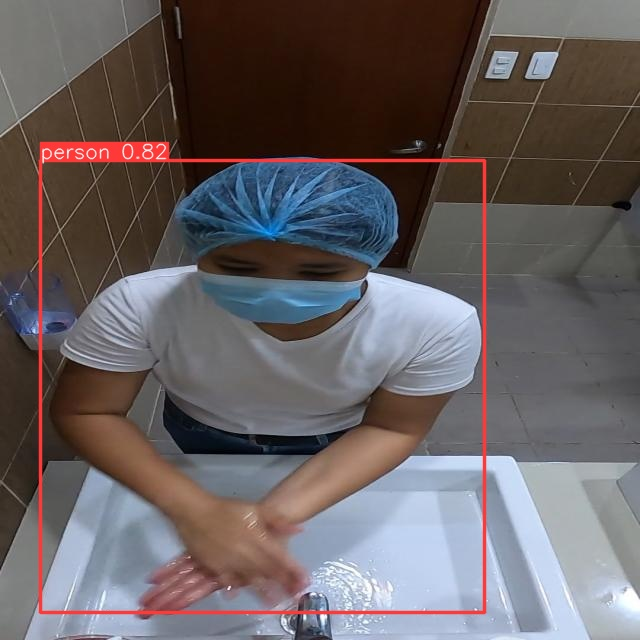

In [7]:
!pip install Pillow
from PIL import Image
Image.open("/content/runs/detect/predict/cols111-mp4_00429_jpg.rf.00ccc85ce6d72474e453cfafa8af475e.jpg")

In [11]:
# /content/data
if os.path.isfile("/content/Result/"):
    print("Dosya mevcut! (There is folder!)")
else:
    os.mkdir("/content/Result/")

%cd /content/Result/

# YoloV8 modeli 50 adımlık eğitimi yapıyorum(I am doing YoloV8 model 50 step training)
# data = "Path to the file with .yaml extension(Oluşturduğunum .yaml uzantılı dosyanın yolu)"
# epochs = How many steps will you train?(Kaç adımlı eğitim yapacağınız)
# imagsz = This is size of image at the training data(Eğitim verilerindeki resimlerin boyutu)
!yolo train model=yolov8n.pt data=/content/Mask-and-Hairnet-Detection-Model-10/data.yaml epochs=20 imgsz=640

/content/Result
100% 6.23M/6.23M [00:00<00:00, 98.5MB/s]
Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Mask-and-Hairnet-Detection-Model-10/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classe

In [12]:
!yolo predict model=/content/runs/detect/train/weights/best.pt source='/content/HairnetDetection/test/images'

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 419, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 97, in __init__
    self._load(model, task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 149, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 628, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 567, in torch_safe_load
    return torch.load(file, map_location='cpu'), file  # load
  File "/usr/local/lib/python3.10/dist-packages/torch/serialization.py", line 986, in load
    with _open_file_like(f, 'rb') as opened

In [13]:
Image.open('/content/runs/detect/predict2/WhatsApp-Video-2023-07-12-at-10_25_21-AM_mp4-11_jpg.rf.11416eb473bfdd9858df51e64a42d50e.jpg')

FileNotFoundError: ignored

In [ ]:
import cv2

video_path = '/content/hairnetİnput3.mp4'
cap = cv2.VideoCapture(video_path)
%cd /content/Result2
!yolo predict model=/content/runs/detect/train/weights/best.pt source='/content/hairnetİnput.mp4'


In [ ]:
# Gerekli kütüphaneyi yükleyin
!apt-get install ffmpeg

# AVI dosyasını MP4 formatına dönüştürün
!ffmpeg -i /content/Result2/runs/detect/predict/hairnetİnput.avi output.mp4


In [ ]:
from google.colab import files

files.download('output.mp4')
